epsff
-----

This notebook produces figures 10 and 11 of the review Krumholz, McKee, & Bland-Hawthorn (2019, ARA&A, submitted). It operates on the following data files: `lada2013.txt` (from [Lada et al., 2013, ApJ, 778, 133](http://adsabs.harvard.edu/abs/2013ApJ...778..133L), data provided by C. Lada), `evans2014_0yso.txt`, `evans2014_1yso.txt`, and `evans2014_nyso.txt` (from [Evans, Heiderman, & Vutisalchavakul, 2014, ApJ, 782, 114](http://adsabs.harvard.edu/abs/2014ApJ...782..114E), data provided by N. Evans), `heyer2016_sf.fits` and `heyer2016_nosf.fits` (from [Heyer et al., 2016, A&A, 588, A29](http://adsabs.harvard.edu/abs/2016A%26A...588A..29H), data downloaded from [VizieR](http://vizier.u-strasbg.fr/viz-bin/VizieR)), `ochsendorf2017.txt`, `ochsendorf2017_j16_yso.txt`, `ochsendorf2017_j16_ha24.txt`, `ochsendorf2017_mag_yso.txt`, and `ochsendorf2017_mag_ha24.txt` (from [Ochsendorf et al., 2017, ApJ, 841, 109](http://adsabs.harvard.edu/abs/2017ApJ...841..109O)), `vutisalchavakul2016_gas.txt` and `vutisalchavakul2016_sfr.txt` (from [Vutisalchavakul, Evans, & Heyer, 2016, ApJ, 831, 73](http://adsabs.harvard.edu/abs/2016ApJ...831...73V)), `lee2016.txt` (from [Lee, Miville-Deschenes, & Murray, 2016, ApJ, 833, 229](http://adsabs.harvard.edu/abs/2016ApJ...833..229L)), `leroy2017.txt` (from [Leroy et al., 2017, ApJ, 846, 71](http://adsabs.harvard.edu/abs/2017ApJ...846...71L)), `utomo2018.txt` (from [Utomo et al., 2018, ApJL, 861, L18](https://ui.adsabs.harvard.edu/#abs/2018ApJ...861L..18U), data provided by D. Utomo), `wu2010.txt` (from [Wu et al., 2010, ApJS, 188, 313](http://adsabs.harvard.edu/abs/2010ApJS..188..313W), data provided by J. Wu), `usero2015.txt` (from [Usero et al., 2015, AJ, 150, 115](http://adsabs.harvard.edu/abs/2015AJ....150..115U), data provided by A. Usero), `stephens2016.txt` (from [Stepens et al. 2016, ApJ, 824, 92](http://adsabs.harvard.edu/abs/2016ApJ...824...29S)), `gallagher2018.txt` (from [Gallagher et al., 2018, ApJ, 858, 90](http://adsabs.harvard.edu/abs/2018ApJ...858...90G)). It also uses an image, `ochsendorf2017.png`, extracted from Figure 1 of [Ochsendorf et al., 2017, ApJ, 841, 109](http://adsabs.harvard.edu/abs/2017ApJ...841..109O), used with permission of the AAS.

In [1]:
# Make plots inline
%matplotlib inline

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import os.path as osp
from astropy.io import fits
import astropy.io.ascii as asc
from astropy.units import pc, kpc, Msun, km, s, cm, erg, Myr, Lsun
from astropy.constants import G, m_p
from collections import OrderedDict
from scipy.special import erfc
import matplotlib.image as mpimg
from matplotlib.ticker import StrMethodFormatter

In [3]:
# Holder for data
data_sets = []

In [4]:
# Import Lada+ 2013 data set; process following method of KDM12 / Krumholz (2014)
ladadat = asc.read(osp.join('data', 'lada2013.txt'))
arealada = ladadat['AREA'].data*pc**2
sigmaSFRlada = ladadat['NSTARS'].data*0.25*Msun/(0.25*Myr)/arealada
sigmaSFRerrlada = np.sqrt(ladadat['NSTARS'].data)*0.25*Msun/(0.25*Myr)/arealada
AKtosigmag = 183*Msun/pc**2
sigmaglada = ladadat['AK_MEAN']*AKtosigmag
masslada = sigmaglada*arealada
areadifflada = arealada[:-1]-arealada[1:]
massdifflada = masslada[:-1]-masslada[1:]
sigmaSFRdifflada = (ladadat['NSTARS'].data[:-1] - 
                    ladadat['NSTARS'].data[1:])*0.25*Msun/(0.25*Myr) \
    / areadifflada
sigmaSFRdifferrlada = np.sqrt(ladadat['NSTARS'].data[:-1] - 
                              ladadat['NSTARS'].data[1:]) \
    *0.25*Msun/(0.25*Myr) \
    / areadifflada
sigmagdifflada = massdifflada/areadifflada
rholada = 3*np.pi**0.5/4*massdifflada/areadifflada**1.5
tfflada = np.sqrt(3*np.pi/(32*G*rholada))
efflada = sigmaSFRdifflada/(sigmagdifflada/tfflada)
epsff = np.array(efflada.to(''))
data_sets.append({'author' : 'L13',
                  'method' : 'YSO counting',
                  'epsff'  : epsff})

In [5]:
# Evans+ 2014 data set; includes 3 files: nyso = >2 YSOs detected, valid upper and lower limits;
# 1yso = 1 YSO detected, results give central estimate and upper limit only, no lower limit
# 0yso = 0 YSOs detected, only upper limit

# Detections plus limits
data = asc.read(osp.join('data', 'evans2014_nyso.txt'))
epsffn = 10.**data['log_Sigma_sfr'] / 10.**data['log_Sigma_ovr_tff']
data = asc.read(osp.join('data', 'evans2014_1yso.txt'))
epsff1 = 10.**data['log_Sigma_sfr'] / 10.**data['log_Sigma_ovr_tff']
epsff = np.concatenate([epsffn, epsff1])
data = asc.read(osp.join('data', 'evans2014_0yso.txt'))
epsff0 = 10.**data['log_Sigma_sfr'] / 10.**data['log_Sigma_ovr_tff']
epsff = np.concatenate([epsff, epsff0])
data_sets.append({'author' : 'E14',
                  'method' : 'YSO counting',
                  'epsff'  : epsff})

# Detections only
data = asc.read(osp.join('data', 'evans2014_nyso.txt'))
epsffn = 10.**data['log_Sigma_sfr'] / 10.**data['log_Sigma_ovr_tff']
data = asc.read(osp.join('data', 'evans2014_1yso.txt'))
epsff1 = 10.**data['log_Sigma_sfr'] / 10.**data['log_Sigma_ovr_tff']
epsff = np.concatenate([epsffn, epsff1])
data_sets.append({'author' : 'E14',
                  'method' : 'YSO counting',
                  'epsff'  : epsff})

In [6]:
# Import Heyer+ 2016 data set; two versions, one with all clouds, one with star-forming only

# Star-forming sample
hdulist = fits.open(osp.join('data', 'heyer2016_sf.fits'))
epsff_lo_heyer2016 = hdulist[1].data['SigmaSFR'] / \
                     (hdulist[1].data['SigmaH2']/hdulist[1].data['tauff'])
epsff_hi_heyer2016 = epsff_lo_heyer2016 * hdulist[1].data['Mcorr']
epsff_heyer2016_sf = np.sqrt(epsff_lo_heyer2016*epsff_hi_heyer2016)
hdulist.close()

# Non-star-forming sample
hdulist = fits.open(osp.join('data', 'heyer2016_nosf.fits'))
epsff_ulim_heyer2016 = hdulist[1].data['SigmaSFRlim'] / \
                       (hdulist[1].data['SigmaH2']/hdulist[1].data['tauff'])
idx = epsff_lo_heyer2016 > 0
mean_corr = np.mean(epsff_hi_heyer2016[idx]/epsff_lo_heyer2016[idx])
epsff_heyer2016 = np.concatenate([epsff_heyer2016_sf, mean_corr*epsff_ulim_heyer2016])
hdulist.close()

# Save both; set with upper limits included does first
data_sets.append({'author' : 'H16', 
                  'method' : 'YSO counting',
                  'epsff' : epsff_heyer2016})
data_sets.append({'author' : 'H16', 
                  'method' : 'YSO counting',
                  'epsff' : epsff_heyer2016_sf})

In [7]:
# Ochsendorf+ 2017 data set, using YSO-determined SFRs and
# the Jameson+ 2016-based cloud catalog; we include this 
# twice, once with just detections, and once including upper
# limits. For the upper limit, we use Ochsendorft+ 2017's 
# estimate that they are insensitive to SFRs below 
# 100 Msun / Myr
data = asc.read(osp.join('data', 'ochsendorf2017_j16_yso.txt'))
epsff = np.copy(data['SFEff'])
idx = epsff == 0.0
epsff[idx] = 100./(data['Mass'][idx]/data['tff'][idx])
data_sets.append({'author' : 'O17',
                  'method' : 'YSO counting',
                  'epsff' : epsff})
epsff = data['SFEff']
data_sets.append({'author' : 'O17',
                  'method' : 'YSO counting',
                  'epsff' : epsff[epsff>0]})

In [8]:
# Vutisalchavakul, Evans, & Heyer 2016 sample
data = asc.read(osp.join('data', 'vutisalchavakul2016_sfr.txt'))
sfr = data['SFR-MIR']
data= asc.read(osp.join('data', 'vutisalchavakul2016_gas.txt'))
m = data['MCloud']
tff = data['tff']
try:
    mtff = m.to('Msun')/tff.to('Myr')
except ValueError:
    # Early versions of astropy throw a value error here, because
    # they don't recognize kMsun (the unit of mass listed in the
    # table) as a valid unit. We therefore have to brute-force it.
    m = np.array(m)*1e3*Msun
    mtff = m.to('Msun')/tff.to('Myr')
epsff = np.array((sfr/mtff).to(''))
data_sets.append({'author' : 'V16', 
                  'method' : 'Cloud matching',
                  'epsff' : epsff})

In [9]:
# Lee, Miville-Deschenes, & Murray 2016 sample
data = asc.read(osp.join('data', 'lee2016.txt'))
data_sets.append({'author' : 'L16',
                  'method' : 'Cloud matching',
                  'epsff' : data['SFRbr']})

In [10]:
# Ochsendorf+ 2017 cloud-matching method
data = asc.read(osp.join('data', 'ochsendorf2017.txt'))
data_sets.append({'author' : 'O17',
                  'method' : 'Cloud matching',
                  'epsff' : data['SFEff']})

In [11]:
# Leroy+ 2017 data
data = asc.read(osp.join('data', 'leroy2017.txt'))
rho = data['SigmaCO-40pc']/(100*pc)      # Leroy's recommended estimate of volume density
tff = np.sqrt(3.0*np.pi/(32*G*rho))
epsff = data['SigmaSFR'] / (data['SigmaCO']/tff)
epsff = np.array(epsff.to(''))
data_sets.append({'author' : 'L17',
                  'method' : 'Pixel statistics',
                  'epsff' : epsff})

In [12]:
# Utomo+ 2018 data
data = asc.read(osp.join('data', 'utomo2018.txt'))
epsff = np.array(data['eff'])
data_sets.append({'author' : 'U18',
                  'method' : 'Pixel statistics',
                  'epsff' : epsff})

In [13]:
# Wu+ 2010 data; unfortunately not written in a nicely-parsable format, so 
# we have to parse it manually; IR converted to SFR using Kennicutt & Evans
# 2012 calibration
fp=open(osp.join('data', 'wu2010.txt'), 'r')
log_lir = []
log_lhcn = []
started = False
for line in fp:
    spl = line.split('\t')
    if len(spl) < 3:
        if not started:
            continue
        else:
            break
    if spl[0] == 'Source': continue
    if spl[1] == '(L_sun)': continue
    if spl[1] == '' or spl[2] == '': continue
    if started == False:
        started = True
    log_lir.append(float(spl[1]))
    log_lhcn.append(float(spl[2].split('(')[0]))
fp.close()
lir = 10.**np.array(log_lir)
lhcn = 10.**np.array(log_lhcn)
sfr = 10.**(np.array(np.log10(lir*Lsun/(erg/s)).to('')) - 43.41)
epsff = np.array(0.01 * (sfr/lhcn/2.0e-7)**(1/1.1))
data_sets.append({'author' : 'W10',
                  'method' : 'HCN',
                  'epsff' : epsff})

In [14]:
# Usero+ 2015 data set; note that what we have in the file is Mdense and
# SFR; to ensure consistency, we convert these back into the original HCN
# and IR luminosities, then use the same Onus+ 2018 calibration as for
# the other HCN data sets
data = asc.read(osp.join('data', 'usero2015.txt'))
lhcn = data['Mdense'][data['det']=='TRUE'] / 10.0  # convert Msun to K km / s pc^2
lir = data['SFR'][data['det']=='TRUE'] / 1.49e-4   # convert SFR to L_HCN
sfr = 10.**(np.array(np.log10(lir*Lsun/(erg/s)).to('')) - 43.41)
epsff = np.array(0.01 * (sfr/lhcn/2.0e-7)**(1/1.1))
data_sets.append({'author' : 'U15',
                  'method' : 'HCN',
                  'epsff' : epsff})

In [15]:
# Stephens+ 2016 data set, using Kennicutt & Evans 2012 conversion from
# FIR to SFR, and Onus+ 2018 calibration of epsilon_ff vs. L_FIR / L_HCN
data = asc.read(osp.join('data', 'stephens2016.txt'))
fluxFIR = 10.**data['logFIR']       # FIR flux in units of Lsun/kpc^2
log_fluxHCN = data['FHCN']          # HCN flux in K km/s pc^2 / kpc^2
fluxFIR = fluxFIR[np.logical_not(log_fluxHCN.mask)]
fluxHCN = 10.**np.array(log_fluxHCN[np.logical_not(log_fluxHCN.mask)])

# Convert to SFR per unit area using Kennicutt & Evans 2012 calibration
Sigma_SFR = 10.**(np.array(np.log10(fluxFIR*Lsun/(erg/s)).to('')) - 43.41)

# Convert SFR / HCN ratio to epsilon_ff using Onus+ 2018 calibration
epsff = 0.01 * ((Sigma_SFR/fluxHCN)/(2.0e-7))**(1/1.1)
data_sets.append({'author' : 'S16',
                  'method' : 'HCN',
                  'epsff' : epsff})

In [16]:
# Gallagher+ 2018 data
data = asc.read(osp.join('data', 'gallagher2018.txt'))
sfr = data['SFR-TIR70um']
lhcn = data['I-HCN']
idx = lhcn > 0.0
epsff = np.array(0.01 * (sfr/lhcn/2.0e-7)**(1/1.1))[idx]
data_sets.append({'author' : 'G18',
                  'method' : 'HCN',
                  'epsff' : epsff})

In [17]:
# Compute statistics on data sets; also count how many data sets
# using each method
methods = OrderedDict()
for i in range(len(data_sets)):
    epsff = data_sets[i]['epsff']
    hist, edges = np.histogram(np.log10(epsff[epsff>0]), 
                               bins='auto', density=True)
    data_sets[i]['hist'] = 0.6*hist/np.amax(hist)
    data_sets[i]['edges'] = edges
    epsff_sort = np.sort(epsff)
    data_sets[i]['cdf'] = np.log10(epsff_sort+1e-30)
    data_sets[i]['effmean'] = np.mean(np.log10(epsff[epsff>0]))
    data_sets[i]['effdisp'] = np.std(np.log10(epsff[epsff>0]))
    data_sets[i]['pct'] = np.percentile(np.log10(epsff), [16, 50, 84])
    if data_sets[i]['method'] in methods.keys():
        if i == 0:
            methods[data_sets[i]['method']]['n'] += 1
        elif data_sets[i]['author'] != data_sets[i-1]['author']:
            methods[data_sets[i]['method']]['n'] += 1
    else:
        methods[data_sets[i]['method']] = {'n' : 1}

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


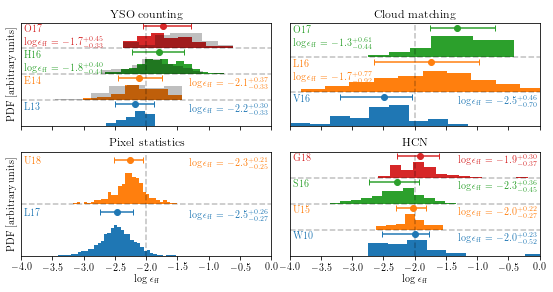

In [18]:
# Plot distributions
plt.figure(1, figsize=(8,4))
plt.clf()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Panels for different methods
for i, k in enumerate(methods.keys()):
    methods[k]['panel'] = i+1
    methods[k]['ctr'] = 0

# Loop over data sets
rpt = False
for i, d in enumerate(data_sets):
    
    # Set panel
    meth = d['method']
    plt.subplot(2,2,methods[meth]['panel'])
    
    # Plot data set
    ctr = methods[meth]['ctr']
    clr = 'C{:1d}'.format(ctr)
    if not rpt:
        plt.bar(d['edges'][:-1], d['hist'], width=d['edges'][1:]-d['edges'][:-1], 
                align='edge', bottom=ctr, color=clr)
    else:
        plt.bar(d['edges'][:-1], d['hist'], width=d['edges'][1:]-d['edges'][:-1], 
                align='edge', bottom=ctr, color='k', alpha=0.25)

    # Plot separator
    if ctr > 0 and not rpt:
        plt.plot([-4,0], [ctr,ctr], 'k--', alpha=0.25)
    
    # Plot mean and stddev
    if not rpt:
        plt.errorbar(np.array([d['pct'][1]]), 
                     np.array([0.85+ctr]), 
                     xerr=np.transpose(np.array([[d['pct'][1]-d['pct'][0], 
                                                  d['pct'][2]-d['pct'][1]]])), 
                     fmt='o', color=clr, ecolor=clr, capsize=3)
            
    # Label
    if not rpt:
        if d['author'] == 'O17' or d['author'] == 'L16' or d['author'] == 'H16':
            plt.text(-3.95, ctr+0.9, 
                     ('{:s}\n$'
                      '\log\epsilon_{{\mathrm{{ff}}}}={:4.1f}^{{+{:4.2f}}}_{{-{:4.2f}}}$').
                     format(d['author'], d['pct'][1], d['pct'][2]-d['pct'][1], 
                            d['pct'][1]-d['pct'][0]), va='top', ha='left',
                     color=clr)
        else:
            plt.text(-3.95, ctr+0.9, d['author'], va='top', ha='left', color=clr)
            plt.text(-0.05, ctr+0.9, 
                      '$\log\epsilon_{{\mathrm{{ff}}}}={:4.1f}^{{+{:4.2f}}}_{{-{:4.2f}}}$'.
                     format(d['pct'][1], 
                            d['pct'][2]-d['pct'][1], 
                            d['pct'][1]-d['pct'][0]), va='top', ha='right',
                     color=clr)
            
    # See if next thing to plot is a repeat of this
    if i != len(data_sets)-1:
        if d['author'] != data_sets[i+1]['author']:
            methods[meth]['ctr'] += 1
            rpt = False
        else:
            rpt = True
    else:
        rpt = False
        
# Adjust axes, labels, and spacing
methods[meth]['ctr'] += 1
for i, k in enumerate(methods.keys()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.xlim([-4,0])
    plt.ylim([0,methods[k]['ctr']])
    plt.plot([-2,-2], [0,methods[k]['ctr']], 'k--', alpha=0.25)
    plt.gca().set_yticks([])
    if i == 0 or i == 1:
        plt.gca().set_xticklabels([])
    else:
        plt.xlabel(r'$\log\,\epsilon_{\mathrm{ff}}$')
    if i == 0 or i == 2:
        plt.ylabel('PDF [arbitrary units]')
plt.subplots_adjust(wspace=0.075, hspace=0.25, left=0.05, right=0.95, top=0.93, bottom=0.12)
        
# Save
plt.savefig(osp.join('figures', 'epsff.pdf'))

In [19]:
# Read in all 4 versions of the Ochsendorf+ 2017 data
cloudcat = ['j16', 'mag']
sfrmeth = ['yso', 'ha24']
o17 = {}
for cc in cloudcat:
    o17tmp = {}
    for meth in sfrmeth:
        data = asc.read(osp.join('data', 'ochsendorf2017_'+cc+'_'+meth+'.txt'))
        epsff = data['SFEff']
        # Apply upper limit to YSO-based method, using O+17's
        # stated detection limit of 100 Msun/Myr
        if meth=='yso':
            ulim = epsff==0.0
            epsff[ulim] = 100./(data['Mass'][ulim]/data['tff'][ulim])
        else:
            ulim = np.zeros(epsff.size, dtype=bool)
        # Save data
        cat = {"epsff"  : epsff,
               "sfr"    : data['SFR'],
               "mcloud" : data['Mass'],
               "tff"    : data['tff'],
               "ra"     : data['RAdeg'],
               "dec"    : data['DEdeg'],
               "name"   : data['Name'],
               "ulim"   : ulim}
        o17tmp[meth] = cat
    o17[cc] = o17tmp
    
# Record index of 30 Dor -- this is the highest SFR in the Ha+24 catalogs
for cc in cloudcat:
    idx = np.argmax(o17[cc]['ha24']['sfr'])
    o17[cc]['ha24']['30dor'] = idx
    offset = (o17[cc]['ha24']['ra'][idx] - o17[cc]['yso']['ra'])**2 + \
                     (o17[cc]['ha24']['dec'][idx] - o17[cc]['yso']['dec'])**2
    idx1 = np.argmin(offset)
    o17[cc]['yso']['30dor'] = idx1
    for meth in sfrmeth:
        i = o17[cc][meth]['30dor']
        print("{:s}, {:s}: 30 Dor: ID = {:s}, log M_c = {:f}, t_ff = {:f}, log SFR = {:f}, eps_ff = {:f}".
              format(cc, meth, o17[cc][meth]['name'][i],
                     np.log10(o17[cc][meth]['mcloud'][i]),
                     o17[cc][meth]['tff'][i],
                     np.log10(o17[cc][meth]['sfr'][i]),
                     o17[cc][meth]['epsff'][i]))
        
# Go through catalogs and find 1-1 matches in position
for cc in cloudcat:
    raoff = np.subtract.outer(o17[cc]['ha24']['ra'], o17[cc]['yso']['ra'])
    deoff = np.subtract.outer(o17[cc]['ha24']['dec'], o17[cc]['yso']['dec'])
    off2 = raoff**2 + deoff**2
    imatch, jmatch = np.where(off2 == 0.0)
    o17[cc]['ha24']['matches'] = -np.ones(len(o17[cc]['ha24']['epsff']), dtype='int')
    o17[cc]['ha24']['matches'][imatch] = jmatch
    o17[cc]['yso']['matches'] = -np.ones(len(o17[cc]['yso']['epsff']), dtype='int')
    o17[cc]['yso']['matches'][jmatch] = imatch

j16, yso: 30 Dor: ID = 97_j16_myso, log M_c = 6.444045, t_ff = 15.300000, log SFR = 4.071882, eps_ff = 0.065000
j16, ha24: 30 Dor: ID = 56_j16_ha24, log M_c = 6.444045, t_ff = 15.300000, log SFR = 4.841985, eps_ff = 0.383000
mag, yso: 30 Dor: ID = 208_mag_myso, log M_c = 5.290035, t_ff = 10.000000, log SFR = 3.773055, eps_ff = 0.306000
mag, ha24: 30 Dor: ID = 43_mag_ha24, log M_c = 5.348305, t_ff = 11.300000, log SFR = 4.959995, eps_ff = 4.610000


In [20]:
# Read the image of 30 Dor, plus its limits
img=mpimg.imread(osp.join('data', 'ochsendorf2017.png'))
xlim=[85.54, 83.89]
ylim=[-69.36, -68.78]

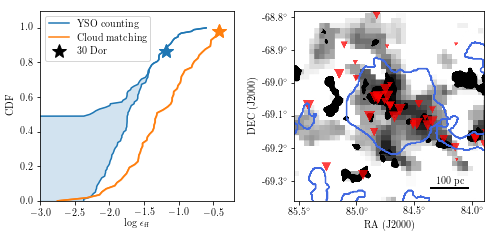

In [21]:
# Plot CDFs from Oschendorf+ 17 for J16 map, plus image of 30 Dor
plt.figure(1, figsize=(8,3.5))
plt.clf()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

# Plot CDFs from two different methods
plt.subplot(1,2,1)
for i, m in enumerate(sfrmeth):
    cat = o17['j16'][m]
    clr = 'C'+str(i)
    epsff = np.copy(cat['epsff'])
    logepsff = np.sort(np.log10(epsff))
    plt.plot(logepsff, np.linspace(0,1,len(logepsff)), color=clr)
    ulim = cat['ulim']
    epsff_lim = np.copy(epsff)
    epsff_lim[ulim] = 1e-30
    logepsff_lim = np.sort(np.log10(epsff_lim))
    if m == 'yso':
        lab = 'YSO counting'
    else:
        lab = 'Cloud matching'
    plt.plot(logepsff_lim, np.linspace(0,1,len(logepsff_lim)), color=clr, label=lab)
    plt.fill_betweenx(np.linspace(0,1,len(logepsff)), logepsff, logepsff_lim, color=clr, alpha=0.2)
    epsff_30dor = epsff[cat["30dor"]]
    cdf_30dor = np.sum(epsff <= epsff_30dor)/float(len(epsff))
    cdflim_30dor = np.sum(epsff_lim <= epsff_30dor)/float(len(epsff_lim))
    plt.plot([np.log10(epsff_30dor), np.log10(epsff_30dor)], 
             [cdf_30dor, cdflim_30dor], '*', color=clr, ms=14)

# Add 30 Dor to legend
plt.plot([10], [10], '*', color='k', ms=14, label='30 Dor')
plt.legend(loc='upper left')

# Adjust axes
plt.xlim([-3,-0.2])
plt.ylim([0,1.1])
plt.xlabel(r'$\log\,\epsilon_{\mathrm{ff}}$')
plt.ylabel('CDF')

# Plot image
ax=plt.subplot(1,2,2)
plt.imshow(img, extent=(xlim[0], xlim[1], ylim[0], ylim[1]),
           aspect=(xlim[0]-xlim[1])/(ylim[1]-ylim[0]))

# Add scale bar
dlmc = 49.97e3    # LMC distance in pc, from Pietrzynski et al., 2013, Nature, 495, 76
xsc = 84.35
ysc = -69.32
dxsc = 100/dlmc*180/np.pi / \
        np.cos(0.5*(ylim[0]+ylim[1])*np.pi/180)  # 100 pc, converted to RA at LMC position on sky
plt.plot([xsc, xsc-dxsc], [ysc, ysc], 'k', lw=2)
plt.text(xsc-dxsc/2, ysc+0.005, '100 pc', horizontalalignment='center',
         verticalalignment='bottom')

# Add axis labels
plt.ylabel('DEC (J2000)')
plt.xlabel('RA (J2000)')
ax.xaxis.set_major_formatter(StrMethodFormatter("{x:.1f}$^\circ$"))
ax.yaxis.set_major_formatter(StrMethodFormatter("{x:.1f}$^\circ$"))

# Adjust spacing
plt.subplots_adjust(wspace=0.3)

# Save
plt.savefig(osp.join('figures', 'epsff_meth.pdf'))